In [1]:
import pandas as pd
df=pd.read_csv('Customer Churn.csv')

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
print(df['gender'].unique())

['Female' 'Male']


In [5]:
df['gender']=df['gender'].map({'Female' : 0 , 'Male' : 1})

In [6]:
print(df['Partner'].unique())

['Yes' 'No']


In [7]:
df['Partner']=df['Partner'].map({'Yes' : 1 , 'No' : 0})

In [8]:
print(df['Dependents'].unique())

['No' 'Yes']


In [9]:
df['Dependents']=df['Dependents'].map({'Yes' : 1 , 'No' : 0})

In [10]:
print(df['PhoneService'].unique())

['No' 'Yes']


In [11]:
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})

In [12]:
print(df['MultipleLines'].unique())

['No phone service' 'No' 'Yes']


In [13]:
multiple_lines_dummies = pd.get_dummies(df['MultipleLines'], prefix='MultipleLines', drop_first=True)
df = pd.concat([df, multiple_lines_dummies], axis=1)



In [14]:
df['MultipleLines_Yes'] = df['MultipleLines_Yes'].astype(int)
df['MultipleLines_No phone service'] = df['MultipleLines_No phone service'].astype(int)


In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,0,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,0
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0


In [16]:
df.drop('MultipleLines', axis=1, inplace=True)

In [38]:
print(df['InternetService'].unique())

['DSL' 'Fiber optic' 'No']


In [40]:
internet_service_dummies = pd.get_dummies(df['InternetService'], prefix='InternetService', drop_first=True, dtype=int)

df = pd.concat([df, internet_service_dummies], axis=1)

In [44]:
df.drop('InternetService', axis=1, inplace=True)

In [46]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,0,1,0,1,0,No,Yes,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0,0
1,5575-GNVDE,1,0,0,0,34,1,Yes,No,Yes,...,One year,No,Mailed check,56.95,1889.5,No,0,0,0,0
2,3668-QPYBK,1,0,0,0,2,1,Yes,Yes,No,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,0,0,0
3,7795-CFOCW,1,0,0,0,45,0,Yes,No,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,No,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,1,0


In [50]:
print(df['OnlineSecurity'].unique())

['No' 'Yes' 'No internet service']


In [52]:
online_security_dummies = pd.get_dummies(df['OnlineSecurity'], prefix='OnlineSecurity', drop_first=True)


In [54]:
df = pd.concat([df, online_security_dummies], axis=1)


In [56]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes
0,7590-VHVEG,0,0,1,0,1,0,No,Yes,No,...,Electronic check,29.85,29.85,No,1,0,0,0,False,False
1,5575-GNVDE,1,0,0,0,34,1,Yes,No,Yes,...,Mailed check,56.95,1889.5,No,0,0,0,0,False,True
2,3668-QPYBK,1,0,0,0,2,1,Yes,Yes,No,...,Mailed check,53.85,108.15,Yes,0,0,0,0,False,True
3,7795-CFOCW,1,0,0,0,45,0,Yes,No,Yes,...,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0,False,True
4,9237-HQITU,0,0,0,0,2,1,No,No,No,...,Electronic check,70.70,151.65,Yes,0,0,1,0,False,False


In [58]:
online_security_dummies = pd.get_dummies(df['OnlineSecurity'], prefix='OnlineSecurity')


In [60]:
online_security_dummies.drop('OnlineSecurity_No internet service', axis=1, inplace=True)


In [62]:
df = pd.concat([df, online_security_dummies], axis=1)



In [66]:
df['OnlineSecurity_No'] = df['OnlineSecurity_No'].astype(int)
df['OnlineSecurity_Yes'] = df['OnlineSecurity_Yes'].astype(int)


In [70]:
df.drop('OnlineSecurity', axis=1, inplace=True)


In [74]:
print(df['OnlineBackup'].unique())

['Yes' 'No' 'No internet service']


In [76]:
online_backup_dummies = pd.get_dummies(df['OnlineBackup'], prefix='OnlineBackup')
online_backup_dummies.drop('OnlineBackup_No internet service', axis=1, inplace=True)


In [78]:
df = pd.concat([df, online_backup_dummies], axis=1)


In [82]:
df['OnlineBackup_No'] = df['OnlineBackup_No'].astype(int)
df['OnlineBackup_Yes'] = df['OnlineBackup_Yes'].astype(int)


In [84]:
df.drop('OnlineBackup', axis=1, inplace=True)


In [90]:
print(df['DeviceProtection'].unique())

['No' 'Yes' 'No internet service']


In [92]:
device_protection_dummies = pd.get_dummies(df['DeviceProtection'], prefix='DeviceProtection')
device_protection_dummies.drop('DeviceProtection_No internet service', axis=1, inplace=True)


In [96]:
device_protection_dummies = device_protection_dummies.astype(int)


In [98]:
df = pd.concat([df, device_protection_dummies], axis=1)


In [102]:
df.drop('DeviceProtection', axis=1, inplace=True)


In [104]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,TechSupport,StreamingTV,StreamingMovies,...,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes
0,7590-VHVEG,0,0,1,0,1,0,No,No,No,...,0,0,False,0,1,0,0,1,1,0
1,5575-GNVDE,1,0,0,0,34,1,No,No,No,...,0,0,False,1,0,1,1,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,No,No,No,...,0,0,False,1,0,1,0,1,1,0
3,7795-CFOCW,1,0,0,0,45,0,Yes,No,No,...,0,0,False,1,0,1,1,0,0,1
4,9237-HQITU,0,0,0,0,2,1,No,No,No,...,1,0,False,0,1,0,1,0,1,0


In [108]:
print(df['TechSupport'].unique())

['No' 'Yes' 'No internet service']


In [110]:
tech_support_dummies = pd.get_dummies(df['TechSupport'], prefix='TechSupport')
tech_support_dummies.drop('TechSupport_No internet service', axis=1, inplace=True)


In [112]:
tech_support_dummies = tech_support_dummies.astype(int)


In [114]:
df = pd.concat([df, tech_support_dummies], axis=1)


In [116]:
df.drop('TechSupport', axis=1, inplace=True)


In [126]:
print(df['StreamingTV'].unique())

['No' 'Yes' 'No internet service']


In [128]:
streaming_tv_dummies = pd.get_dummies(df['StreamingTV'], prefix='StreamingTV')
streaming_tv_dummies.drop('StreamingTV_No internet service', axis=1, inplace=True)


In [130]:
streaming_tv_dummies = streaming_tv_dummies.astype(int)


In [132]:
df = pd.concat([df, streaming_tv_dummies], axis=1)


In [134]:
df.drop('StreamingTV', axis=1, inplace=True)


In [140]:
print(df['StreamingMovies'].unique())

['No' 'Yes' 'No internet service']


In [142]:
streaming_movies_dummies = pd.get_dummies(df['StreamingMovies'], prefix='StreamingMovies')
streaming_movies_dummies.drop('StreamingMovies_No internet service', axis=1, inplace=True)


In [144]:
streaming_movies_dummies = streaming_movies_dummies.astype(int)


In [146]:
df = pd.concat([df, streaming_movies_dummies], axis=1)


In [148]:
df.drop('StreamingMovies', axis=1, inplace=True)


In [152]:
print(df['Contract'].unique())

['Month-to-month' 'One year' 'Two year']


In [154]:
contract_dummies = pd.get_dummies(df['Contract'], prefix='Contract')


In [156]:
contract_dummies.drop('Contract_Month-to-month', axis=1, inplace=True)


In [158]:
contract_dummies = contract_dummies.astype(int)


In [160]:
df = pd.concat([df, contract_dummies], axis=1)


In [162]:
df.drop('Contract', axis=1, inplace=True)


In [166]:
print(df['PaperlessBilling'].unique())


['Yes' 'No']


In [168]:
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})


In [172]:
print(df['PaymentMethod'].unique())

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [174]:
payment_dummies = pd.get_dummies(df['PaymentMethod'], prefix='PaymentMethod')


In [176]:
payment_dummies.drop('PaymentMethod_Electronic check', axis=1, inplace=True)


In [178]:
payment_dummies = payment_dummies.astype(int)


In [180]:
df = pd.concat([df, payment_dummies], axis=1)


In [182]:
df.drop('PaymentMethod', axis=1, inplace=True)


In [186]:

print(df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()][['customerID', 'TotalCharges']])


      customerID TotalCharges
488   4472-LVYGI             
753   3115-CZMZD             
936   5709-LVOEQ             
1082  4367-NUYAO             
1340  1371-DWPAZ             
3331  7644-OMVMY             
3826  3213-VVOLG             
4380  2520-SGTTA             
5218  2923-ARZLG             
6670  4075-WKNIU             
6754  2775-SEFEE             


In [188]:
# Step 1: Convert to numeric (invalid values become NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [192]:
# Step 2: Fill missing values with median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


In [194]:
print(df['TotalCharges'].dtype)

float64


In [196]:
print(df['TotalCharges'].isnull().sum())

0


In [200]:
print('Churn' in df.columns)


True


In [202]:
df['Churn'].head()


0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [204]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1}).astype(int)


In [206]:
df['Churn'].value_counts()


Churn
0    5174
1    1869
Name: count, dtype: int64

In [210]:
df.isnull().sum()


customerID                                 0
gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineSecurity_No                          0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_Yes                           0
DeviceProtection_No                        0
DeviceProt

In [212]:
df.drop('customerID', axis=1, inplace=True)



In [214]:
df.dtypes


gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int32
MultipleLines_No phone service               int32
MultipleLines_Yes                            int32
InternetService_Fiber optic                  int32
InternetService_No                           int32
OnlineSecurity_No internet service            bool
OnlineSecurity_Yes                           int32
OnlineSecurity_No                            int32
OnlineSecurity_Yes                           int32
OnlineBackup_No                              int32
OnlineBackup_Yes               

In [216]:
df['OnlineSecurity_No internet service'] = df['OnlineSecurity_No internet service'].astype(int)


In [218]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int32
MultipleLines_No phone service               int32
MultipleLines_Yes                            int32
InternetService_Fiber optic                  int32
InternetService_No                           int32
OnlineSecurity_No internet service           int32
OnlineSecurity_Yes                           int32
OnlineSecurity_No                            int32
OnlineSecurity_Yes                           int32
OnlineBackup_No                              int32
OnlineBackup_Yes               

In [220]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])


In [222]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()


,tenure,MonthlyCharges,TotalCharges
count,7.043000e+03,7.043000e+03,7.043000e+03
mean,-2.421273e-17,-6.406285e-17,-1.488074e-17
std,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.318165e+00,-1.545860e+00,-9.991203e-01
25%,-9.516817e-01,-9.725399e-01,-8.298459e-01
50%,-1.372744e-01,1.857327e-01,-3.904632e-01
75%,9.214551e-01,8.338335e-01,6.642871e-01
max,1.613701e+00,1.794352e+00,2.826743e+00


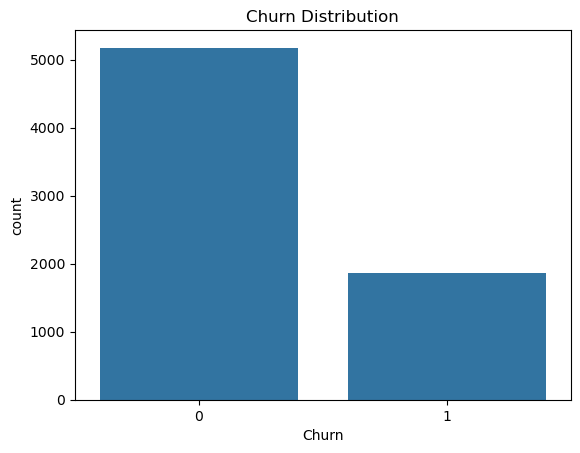

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

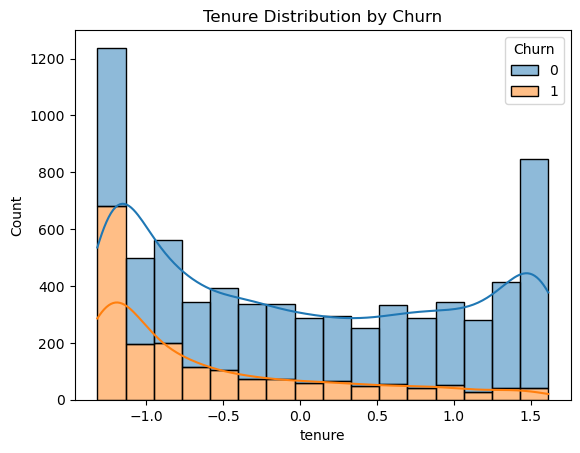

In [232]:
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, multiple='stack')
plt.title('Tenure Distribution by Churn')
plt.show()

#customer who spend less time churn more


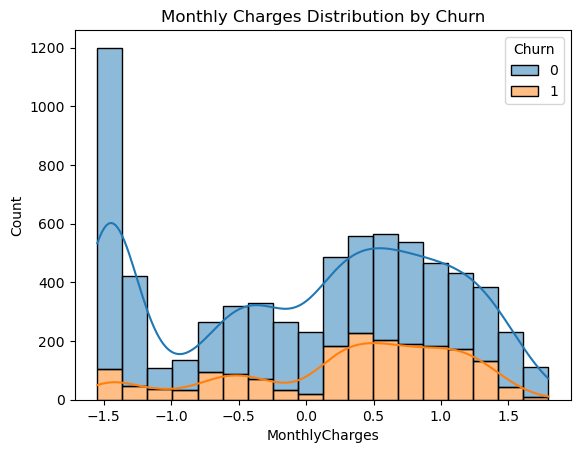

In [234]:
# Monthly Charges
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, multiple='stack')
plt.title('Monthly Charges Distribution by Churn')
plt.show()

#cutomer who are spending more money churn more

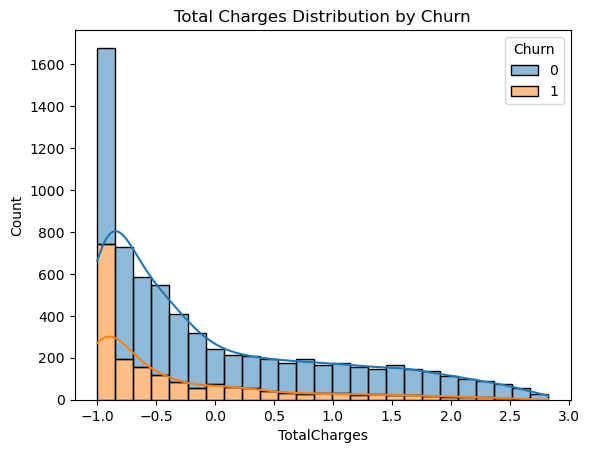

In [236]:
# Total Charges
sns.histplot(data=df, x='TotalCharges', hue='Churn', kde=True, multiple='stack')
plt.title('Total Charges Distribution by Churn')
plt.show()

#customers who dd not spend more moeny in company churn more

In [238]:
print(df.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check'],
      dtype='object')


C:\Users\Hy\AppData\Local\Temp\ipykernel_9948\2811557000.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')


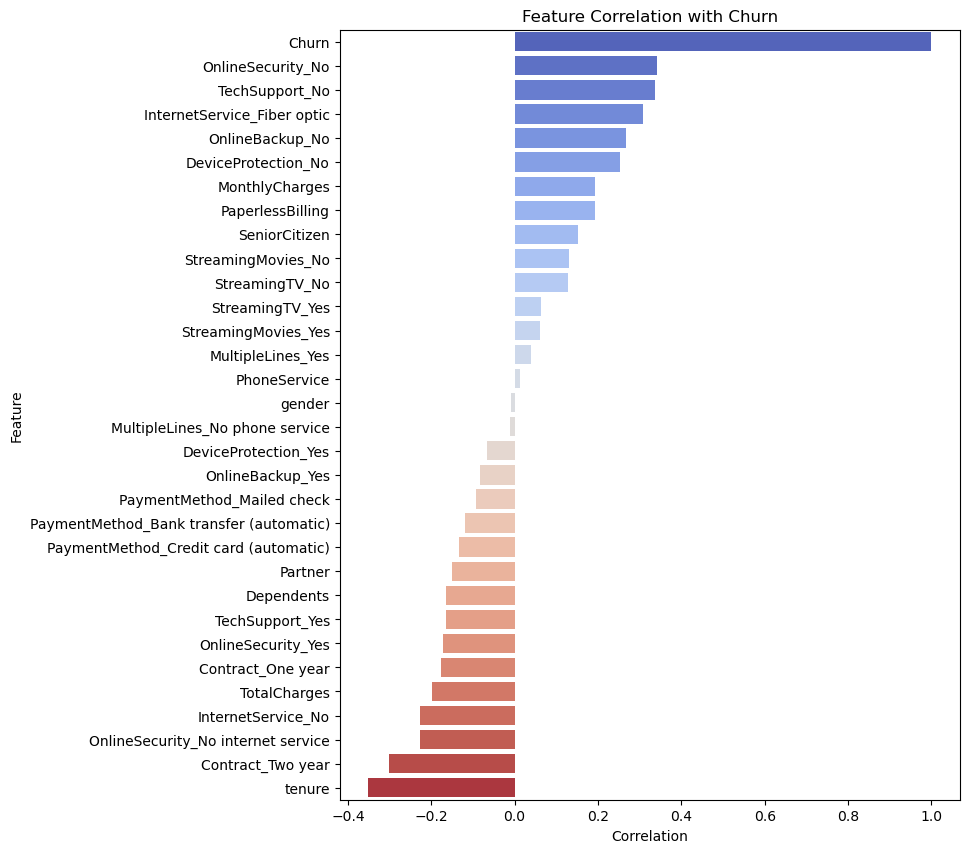

In [242]:
correlations = df.corr()['Churn'].sort_values(ascending=False)

plt.figure(figsize=(8,10))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.title('Feature Correlation with Churn')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.show()


In [244]:
correlation['Churn'].sort_values(ascending=False)


Churn                                      1.000000
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
MonthlyCharges                             0.193356
PaperlessBilling                           0.191825
SeniorCitizen                              0.150889
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService                               0.011942
gender                                    -0.008612
MultipleLines_No phone service            -0.011942
DeviceProtection_Yes                      -0.066160
OnlineBackup_Yes                          -0.082255
PaymentMetho

In [246]:
#postive close to 1 = more likely to churn
# negative close to 1 = less likely to churn

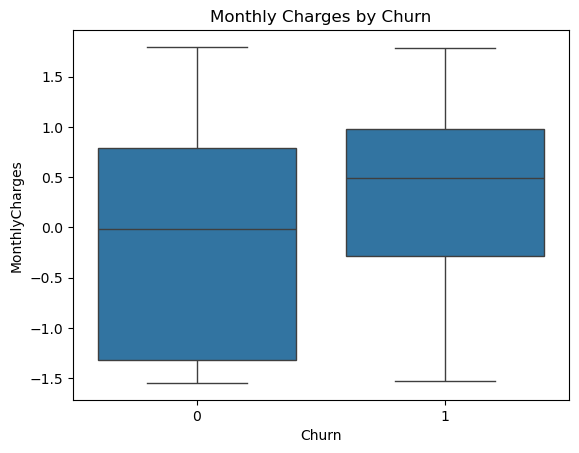

In [248]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.show()


In [252]:
# customers who were paying more than average churn 
#churn 1 has more high values = right skewed
#churn 0 has less more values = left skewed
# churn 1 is narrow spread
#churn 0 is wide sperad 


#Higher Monthly Charges may contribute to a higher churn risk.

#Non-churned customers may include both low-paying and some high-paying customers, but their charges are more spread out

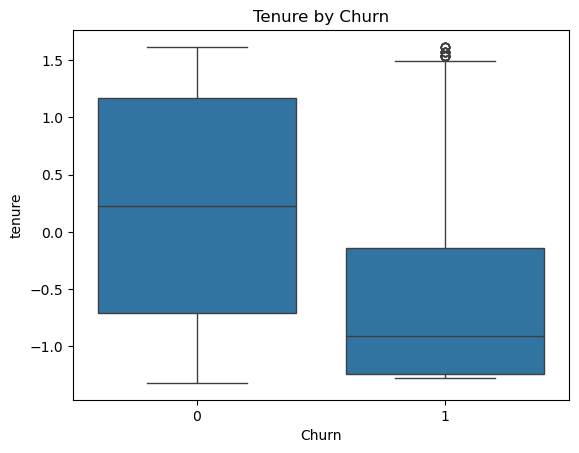

In [256]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure by Churn')
plt.show()

In [258]:
#Customers who churned tend to be newer customers who didn’t stay long.
#Longer-tenure customers are more loyal and less likely to churn.

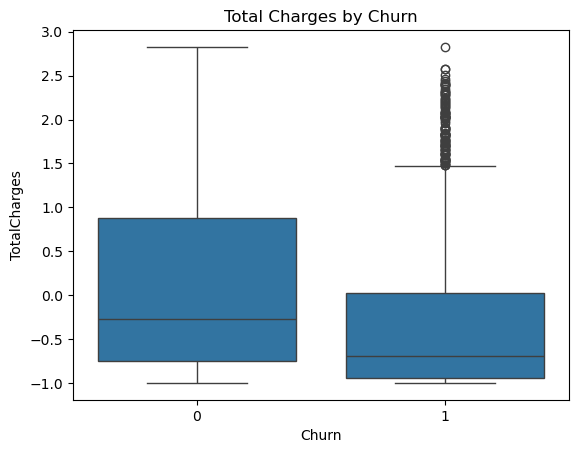

In [260]:
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges by Churn')
plt.show()

In [262]:
#Churned customers usually don't pay much over their lifetime — they tend to leave earlier before paying large total charges.

#Customers who stay longer naturally paid higher total charges.



In [264]:
df.groupby('Churn')[['tenure', 'MonthlyCharges', 'TotalCharges']].mean()


,tenure,MonthlyCharges,TotalCharges
Churn,,,
0,0.211698,-0.116212,0.119626
1,-0.586048,0.321712,-0.331163


In [266]:
#Customers who churned tend to be:

#Newer (low tenure)

#Paying more monthly (high MonthlyCharges)

#With lower total lifetime spend (low TotalCharges)



In [268]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)  # Features
y = df['Churn']               # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#stratify=y makes sure the churn ratio is balanced in both train and test

In [270]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [272]:
y_pred = model.predict(X_test)

In [274]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7388218594748048


In [276]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [278]:
# Classification Report Summary:
# - Accuracy: 74%
# - Class 0 (No Churn): High precision (0.90), moderate recall (0.72)
# - Class 1 (Churn): Good recall (0.78), but lower precision (0.51)
# - The model is effective at catching churners, which is important,
#   but may incorrectly flag some loyal customers as churners.


In [280]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with class_weight to handle imbalance
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [282]:
y_pred_rf = rf_model.predict(X_test)


In [284]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Accuracy: 0.7814052519517388


In [286]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.62      0.47      0.53       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



In [288]:
from sklearn.model_selection import GridSearchCV

In [290]:
#GridSearchCV: Helps test different hyperparameter combinations automatically

In [292]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced', 'balanced_subsample']
}


In [294]:
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='recall',  # We care most about catching churners!
    cv=3,              # 3-fold cross-validation
    n_jobs=-1,         # Use all CPU cores to speed things up
    verbose=2          # Show progress
)


In [296]:
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='recall', verbose=2)

In [297]:
print("Best Recall Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)


Best Recall Score: 0.7103738937044102
Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [300]:
final_rf = RandomForestClassifier(
    class_weight='balanced',
    max_depth=10,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

final_rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [302]:
y_pred = final_rf.predict(X_test)

In [308]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1035
           1       0.55      0.71      0.62       374

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.77      0.78      1409



In [310]:
#The tuned Random Forest model improved both accuracy and precision compared to Logistic Regression. While logistic regression had slightly higher recall, the Random Forest offered a better balance between catching churners and reducing false positives, making it a more practical choice for churn prediction.

In [312]:
from sklearn.metrics import classification_report

y_probs = final_rf.predict_proba(X_test)[:, 1]

# Try with threshold = 0.45
threshold = 0.45
y_pred_thresh = (y_probs >= threshold).astype(int)

print(classification_report(y_test, y_pred_thresh))


              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1035
           1       0.52      0.75      0.61       374

    accuracy                           0.75      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.75      0.76      1409

